In [9]:
import requests
from bs4 import BeautifulSoup
from unicodedata import normalize
from datetime import datetime

sources = (
    {
        "car": "Golf VI Benzin",
        "models": ['gti', 'gt'],
        "lines": ['sportline', 'comfortline', 'highline', 'trendline'],
        "transmissions": ['dsg'],
        "url": "https://www.hasznaltauto.hu/talalatilista/PDNG2VGRN3NTADH4C56YD3JYZWTDY3QYKZQAQBXMAMGCMZQ4YWJBQSFS2GSMRP4PWLO5I4XTMTRE4ITZ4TESAV3L7HXGKXSI2FBMBBU4QIO7MYWLLAXILP5BIF6YKLWQACKVFACOB7XCN7FELSGQC7IPGX4JXWHOMU3CL2IZ23QCVI3MJSJESIMWBS6M3GNVCTMLSKVZW55UNRDLR75FZVMCB3KRTHHJQY6FFZGDO4RUKAYO5RAYCVX6ZGASEKQFJX3ATRZV67UFBHZQ2AJ7VIM4P3ATTQAZU2HFRS4RTPSFTPGWGRQ7SA43NGNIGH32XBQYPPWTYHDRUK5OSVSUHNLPZM4774HO7A4RZHWBN4ZPQD25V4HOQR5C4AFIPTQHGJ7ZID37DUMQVCXMNM65FHGSQBV2CUXVI6Y7EJKG36M2AGVVTYMFNORJZNATLXYJ5LJPSM7KYVDLDZYRIF4LF2YHSPWJVFNWVJLSCTOE7M4LFZKCNDGTEU2CEWU3RX4O5UFPMCUN3ABK72C5RUPBY5TVD6FIDVTQUEIPS5OKFOMY64IR4NRIYVZRL2GXCGPDOKGNOQ56TSDXKQW3UDV5YF6JFGLRVHBTWBM2RLOYOUDBN4R2RUPL6URMR7D23UO4VAO6IFPR4HZCNYXDGQIGBMTFGYOSN33PFUN3PHPDF5JCQT2H6U3AO42GKFRRXIRVPQCXWDOJUVMEG53MKKV6MMH3VXK4VQHCNBAHHCP5EQKYMBYWLV4WXSK67M44O42CP5MTJX4TUUJTS2USFS6D7TUB62FL4OUSNNAJXJFDZX4EPYMX72E55R3R6PF7QSMHZ2QJ2NLW74HUPXMLTY"
    },
    {
        "car": "Octavia 2013-2015",
        "url": "https://www.hasznaltauto.hu/talalatilista/PDNG2VG3R3NDAEH5C57UCLVQ3ONMOVSVK6VFBJL6IA2JAIMY3APGIO6RYKFH73ZYBFWJZZJJUNZ6YOLTHEHMQ4RNH66MYCZJLIENRECTWDCV43AYZOS7AVZUVAX5ABI2UCKRJIGTQPNQSPZKK5RUBX2DBX7CUNR3TFGUS6UGGW4MUKA3SNSFFCBFAPXXGZRNAV3K4SXONWPRD4O2IOPVKLPIKCO4BGLOZARUKPT4L6SWRQEB3UV5BSR7HFIMITSBSN64FMPGBYO6UIYGPJBD6OVHL5YAU4ECVERO5ZOAIXZCZXTKTKYPZAONPKNIH536XBQIPPWTYFDY3EVVWJWFB65WTTZQ73YOT7B6CGP4E2B77UHVNKHX4NWTQJS7NHIPMT7CQH76HIZBIFGZW55HNBUTDNYC2VFKX3FRNKYYPVTYE2WUPJRLRZ346VJE454CHJ375BD2WFN6Y6KYCDXFXZZ3IWLJOX6YOHZSHOYWMPX232SVJAJ7FBQONTBBAWVT6RIUEJKG4K5DWNRQ3AFTIYQDXS2A6NN2OLMN43IQAOW6CTBB6LVZIVZSD7RSFRWFDCLTCLWHPAK6HVIYV6DXYOIP5WELMQOXXGYCYNHFKLFXGBVWB62RL66QYCRL2TVDY6XRJN6HMPLWRLWUB3WRL4JJ6NDOE4ZVCBQDE2RWDUTO7LZNLO4Z3YZPKIUE6B7VHYDXGRSRMMN2ET34AU5Q3SNFVCQTXNVNKVZZQHOYNJSWA4JUUA44O6QSQXQ4SRM7LZN3FF36Z3YZZUE7C7C7OZHJJCHJUJAL56HXHIF5UCXQ5ZA22ATKT2DV7TD7BW77IRX6HOHZVX6KI7LH2DHAVO75A5RB7D2I"
    },
    {
        "car": "A3 2005-2010 Benzin",
        "lines": ['ambition', 'attraction'],
        "url": "https://www.hasznaltauto.hu/talalatilista/PDNG2VHNR3NDAED4C47UDERLXXLPY3CV6WSAUVPKANCAWWMCRHWUL7UIBZHLY66XE3DTSOL6CHG5RO5TWNRUAPVN4SNZO5JDYUAAC63SBI3DRCRVMO2RJ7UCA32RSYVABR6ZCAXU7TQGNQQPZJ2RRUEP2CA37CHVKZLFHEMRMEG24NOKUYRJKFDCZHAGXSNMUTAORWWZXXGSGIS5XP36PLQWORUI7YCMZR22JKHT56ZRIPJYWA5QKWXZA4DZUNBJNCZA6OHOXFCYP6UAQEPNB56J5ELRYAY4MFJMJM7MLESHX4OS2GCNK55MTCUQJX7HMHAQ47OUYGTR4T64VOVHFN3PJOPX66FX74YIOPPYJUDP7II32UHH3YLJYNWXNUIHGJ7ZID37DUMQVCXMJNLZZYPCA3OABLOKFCNVEN7J4M56HVFB2YJZD5OU2OG2ATWRD5IS6NULENNQLYL547WFEU2VVNH6Y3PPTGW7HBB47GQEMFPGAVM4VHRDDDBGBFRJTJI3GGFR5TEPCBL3QZPKZAKX62TG5GOMXO56MZVAGWOCRFAVPG6AHWQ6LV2GDWLNZ3GVHS3FHEATJNA4EUBQXDKRUPD46FDLMTXTJGQLBVMWHE26EPNZUXU4QEAFHVVK5EYHS7YZHCGUHCL7SVBHTWVL24JKYGKFRVBURK7WFVWDLTBOUUPDU4XSVQVGCDWRUCKYDRORQDTJJ5GMHLSFPE5COYM4RHWHSJRZ7UE7C3REPMTUEBD73LAKF6AWXIB5UNX7PZD22BTKN2HZ6Y34DT7XAO6553HGXD72IXJUNAFWDV77DDNYAJA"
    },
    # {
    #     "car": "Jetta 2005-2010 Benzin",
    #     "url": "https://www.hasznaltauto.hu/talalatilista/PDNG2VHNN3RDAED4C47UDEQW3IZT732ULWSRGOXJDYQFVSASRQ7RN6JDFJKLZ65NIOQETSRPUIMXWZ3WO4GMRJ4F7QGLFLFE2AILCJNPMCGZ2WBRKZFBDTTI2GOCARPKUFTSTQCMB6XAO7FPPSBRCQYHBWCLGWDNMQYRJ2IYG3QGXK24FZJEQIPGBR6IZGMFCSMHYPNZW57EJZDLO56VM5LAMJ6QA32TL5DYVMX7PWI2EBIPN2V4BKHQ4BAJKOYFIPXADR42DP2GR5QY5EAX334433QBBYIAQMR64ZOHEZ4RN3YNBVMHTR2GHWG4CWZ7NTMGGSBGQ2WPDRC2IXI2XPOO476DH6G525YHQBV7ZHRD75E53JRBRTNUMKMW2CUR5QPRLYS7J6LKEIXX32GM44DRBNPEHLM2TPWPGMT77VQIEGRUMZQLRZ3S7FNA455CHKTHAQBT3MWXMPBMRC323445VIUBNX6Y5PTHXNXMPPSN5NPKKSOBNZAN5U4IIMLKHPH5DBE2ASEX2JYOGC4BHNDCAW6LIT3VJVS37PKLF4DMNQER4K4CE556I7L2ETZ6Z3K2NXBUW5OJMM2AXLTDAWMYPFGAMA36U7MCHT6OUA6ZH3R5K34T34SY6ON3GEDBJBNTCHFGCDHJV45IY74FECQVNCTT5RTAZEUBVVBRF455JMBRGC4ZINKM4LWDSNMGHFDNUKALWORRD3JR7OMSR5HPE2D63LGJTW5DDR3TYJYJZGPPZDIZ4PFVSMVLYBFOQHXIJIO6SFX4DWEJUOL6WHYFH7QC75DSDU3QP7QXNWJUKNZSO34Q7PNJQCOA"
    # },
    # {
    #     "car": "Hyundai i20 Benzin",
    #     "url": "https://www.hasznaltauto.hu/talalatilista/PDNG2VC3N3NTAEF4BNHWBSMPUT2GPC5CAEFKGQAPECWK3NKMRPSBU7AIWEB57PKLJF2UJRK7LLGJAO73DAFOI4RNH66CYSRJLIENRECTWDBU43AZFOSPANZUVCXRAA7V2BFAVUHZYHOYRH4UVMY2B35AAZ7RHW55LSGESOUGGW4MUKE3SIWKIEDTA3PKPTC2BKGK5SXO5WPBD2O2IOPVKLPIKCO4DGOY46I2F2F7F5JDJYGADYKGRZM7DQUFHJ5AZE7OCWDTR4HPKCIDHWQR7HOTJ44AOOGDLAI7O4XEEJ4RM3ZVRVMPDQBGHVG4D775ODAQ47OUYETY2JLLFULL3WXLPTHN7PJ3PYHIOZ7QRMGP4ROXVEB7VAJILHQRA7JA6NN7T4GHSGQ2BSF62UB42KINXALCUVJHBEPMLJSMYE34NKKGVVDYFK6YXT3D344NUAXNDH2RZ73ISHIPBDBJGTJ7TBWNHXDHVM5BL4SELTBJCDIXIJV6NGJSFJF4LZKGGYV5QKZUMIF3ZIAPGU4LBX6UXULQHLPBIIQ7D244K6ZBRYRSYXSRAL2TXQOOEVMKK5B3Z3XTCU6JCE62AZOXIX22Z245ZXU4QGWUE3OFTYZTA2ZPNL2PRFPC6Z4NYGWNRXNL5PJSHVN54RD2TIDAFDFGLSGIPSP3LPF3M3NH7BDAVZPJVDPKOYGBFBVGYQZSQ2XWBLZBXOKDI5DERNNDLBOZNWWVMBTGI4BZUS5KE5J6RH2X6LSK2JL35WTBZTYJ7VSVM7CHSZHOJKGJWLYP4OAH3IV7V2SIVYAW3MUKL2DP6CN76NH7IPUMTPP4KDZ2ISBXMUWY7UP4ERMLHA"
    # },
)

cookies = {'telepules_id_user_uj': '839daca5a7d45c82eff8538fbcd3f859e57745992061c5f2e7264ff32a2641e6a%3A2%3A%7Bi%3A0%3Bs%3A20%3A%22telepules_id_user_uj%22%3Bi%3A1%3Bs%3A4%3A%221361%22%3B%7D'}	

data = []


In [10]:
def find(keywords, str, default):
    for w in keywords:
        if w in str:
            return w
    return default
    
def parse(item, source):
    car = {}

    car['price'] = int(''.join(filter(lambda x: x.isdigit(), 
                        item.find("div", {"class": "vetelar" }).get_text())))

    car['id'] = int(''.join(filter(lambda x: x.isdigit(), 
                        item.find("div",{"class": "talalatisor-hirkod"}).get_text())))

    info = item.findAll("span",{"class": "info"})

    if len(info) != 6:
        raise Exception("Missing car data: " + item.get_text()) 

    car['year'] = info[1].get_text().strip(',')
    tmp = car['year'].split('/')
    if len(tmp) == 1: tmp.append(6)

    car['date'] = datetime(int(tmp[0]),int(tmp[1]),1)

    car['volume'] = ''.join(filter(lambda x: x.isalnum(), info[2].get_text()))
    
    car['ps'] = int(''.join(filter(lambda x: x.isdigit(), info[4].get_text())))

    car['mileage'] = int(''.join(filter(lambda x: x.isdigit(), info[5].get_text())))
    if (car['mileage'] > 1000000):
        raise Exception("Invalid milage data")
    
    car['dist'] = int(''.join(filter(lambda x: x.isdigit(), 
                    item.find('span',{'class': 'tavolsag_talalati'}).get_text())))
    car['link'] = item.find('a')['href']
    #car['icon'] = item.find("img",{"class": "img-responsive"})['data-lazyurl']
    car['raw'] = normalize("NFKD",item.get_text().lower())

    # Type specific fields
    if 'models' in source:
        car['model'] = find(source['models'], car['raw'], None)
    
    if 'transmissions' in source:
        car['transmission'] = find(source['transmissions'], car['raw'], 'manual')
    
    if 'lines' in source:
        car['line'] = find(source['lines'], car['raw'], None)

    return car

def parse_all(items, source):
    cars = []
    for item in items:
        try:
            cars.append(parse(item, source))
        except Exception as e:
            print(e)
    return cars

def load_page(url):
    page = requests.get(url, cookies=cookies)
    soup = BeautifulSoup(page.text, "html.parser")
    return soup

def load_source(source):
    cars = []

    # Load the first result page
    soup = load_page(source['url'])

    # Get items
    items = soup.findAll("div", {"class": "talalati-sor" })
    cars += parse_all(items, source)

    # Check if we got other pages to load
    pages = soup.find("li", {"class": "last" })
    if pages is None: 
        return cars 
    max_page = int(pages.get_text())

    # Load the remaining ones
    for page_num in range(2,max_page + 1):
        next_url = source['url'] + '/page' + str(page_num)
        soup = load_page(next_url)
        items = soup.findAll("div", {"class": "talalati-sor" })
        cars += parse_all(items,source)
    
    return cars


In [11]:
src = sources[0]
soup = load_page(src['url'])
items = soup.findAll("div", {"class": "talalati-sor" })
print(parse(items[0],src))


{'price': 1899000, 'id': 16000242, 'year': '2009/6', 'date': datetime.datetime(2009, 6, 1, 0, 0), 'volume': '1390cm³', 'ps': 122, 'mileage': 200000, 'dist': 422, 'link': 'https://www.hasznaltauto.hu/szemelyauto/volkswagen/golf_vi/volkswagen_golf_vi_1_4_tsi_highline_dsg_sz_konyv_kituno-16000242', 'raw': 'volkswagen golf vi 1.4 tsi highline dsg sz.könyv/kitűnő!kiemelt állítható kormány alufelni asr automata bluetooth bőr cd-rádió centrálzár esp fűthető tükör isofix 1 899 000 ft121 899 000 ftbenzin, 2009/6, 1 390 cm3, 90 kw, 122 le, 200 000 kmszervizkönyv+friss szerviz! összes gyári kulcs! nagyon jó műszaki és esztétikai...(hirdetéskód: 16000242) 422 km-re1.pp', 'model': None, 'transmission': 'dsg', 'line': 'highline'}


In [12]:
for s in sources:
    cars = load_source(s)
    for c in cars:
        c.update({'car': s['car']})
    data += cars



Missing car data: VOLKSWAGEN GOLF VI Golf 6 RÁLLÍTHATÓ KORMÁNY ALUFELNI ASR BI-XENON BLUETOOTH BŐR CD-RÁDIÓ CENTRÁLZÁR FŰTHETŐ TÜKÖR GPS ISOFIX KIHANGOSÍTÓ 4 999 000 Ft64 999 000 FtBenzin, 2013/4, 270 kW, 367 LE, 135 000 kmEladó Golf 6 R Usa modell. Stage 2+ Több infó...(Hirdetéskód: 15977775) 242 km-re199.PP
invalid literal for int() with base 10: ''
invalid literal for int() with base 10: ''
Invalid milage data


In [13]:
import pandas as pd
import plotly.express as px
import numpy as np
import plotly.io as pio

df = pd.DataFrame(data)


In [14]:
df.head(5)


,price,id,year,date,volume,ps,mileage,dist,link,raw,model,transmission,line,car
0,1899000,16000242,2009/6,2009-06-01,1390cm³,122,200000,422,https://www.hasznaltauto.hu/szemelyauto/volksw...,volkswagen golf vi 1.4 tsi highline dsg sz.kö...,None,dsg,highline,Golf VI Benzin
1,2199000,14902504,2010/2,2010-02-01,1390cm³,122,127000,242,https://www.hasznaltauto.hu/szemelyauto/volksw...,volkswagen golf vi variant 1.4 tsi comfortline...,None,dsg,comfortline,Golf VI Benzin
2,2390000,15954372,2011/10,2011-10-01,1197cm³,105,139000,240,https://www.hasznaltauto.hu/szemelyauto/volksw...,volkswagen golf vi 1.2 tsi highlinekiemelt ál...,None,manual,highline,Golf VI Benzin
3,2490000,16030216,2011/10,2011-10-01,1390cm³,122,133644,232,https://www.hasznaltauto.hu/szemelyauto/volksw...,volkswagen golf vi variant 1.4 tsi comfortline...,None,manual,comfortline,Golf VI Benzin
4,2599000,15983905,2011/9,2011-09-01,1197cm³,86,125000,359,https://www.hasznaltauto.hu/szemelyauto/volksw...,volkswagen golf vi 1.2 tsi trendline dsg style...,gt,dsg,trendline,Golf VI Benzin


In [15]:
pio.renderers.default = "svg"


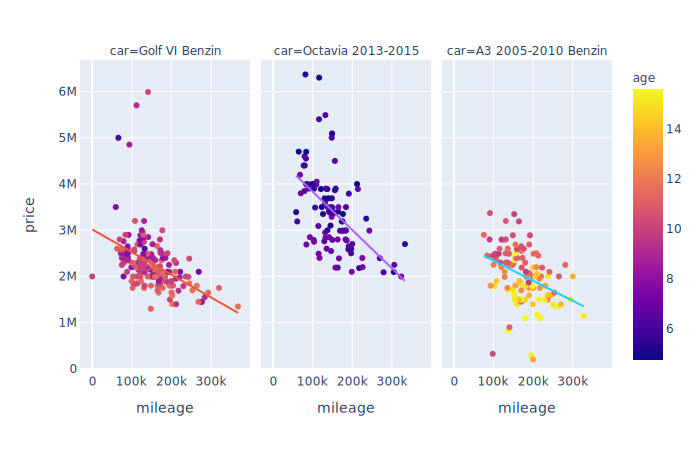

In [16]:
#df = df.query('1500000 <= price <= 2500000')
#df = df.query("transmission != 'dsg'")
df = df.query("model != 'gti'")
df = df.query("model != 'gt'")
df = df.query("model != 'dsg'")

df['age'] = ( datetime.now() - df.date )/np.timedelta64(1, 'Y') 
px.scatter(df, x="mileage", y="price", facet_col="car", trendline='ols',
            color='age')


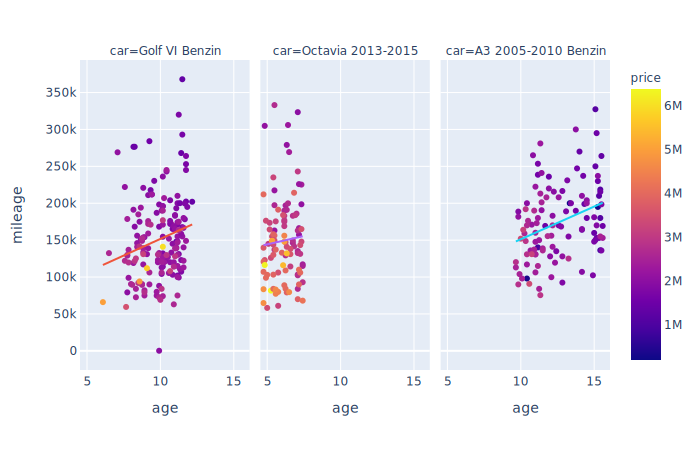

In [17]:
px.scatter(df, x="age", y="mileage", facet_col="car", trendline='ols',
           color='price')

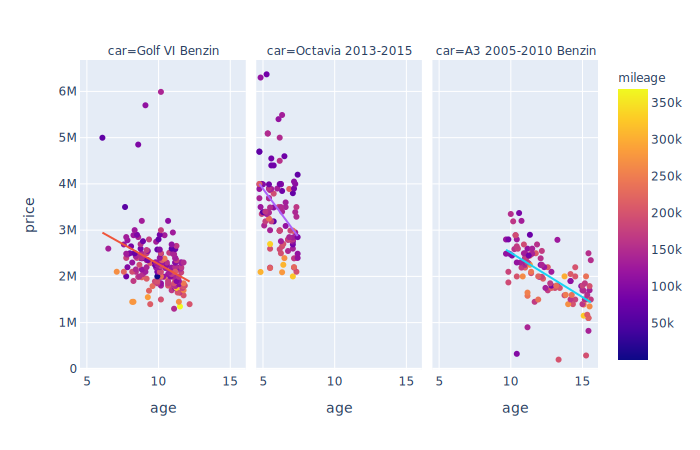

In [18]:
px.scatter(df, x="age", y="price", facet_col="car", trendline='ols',
            color='mileage')

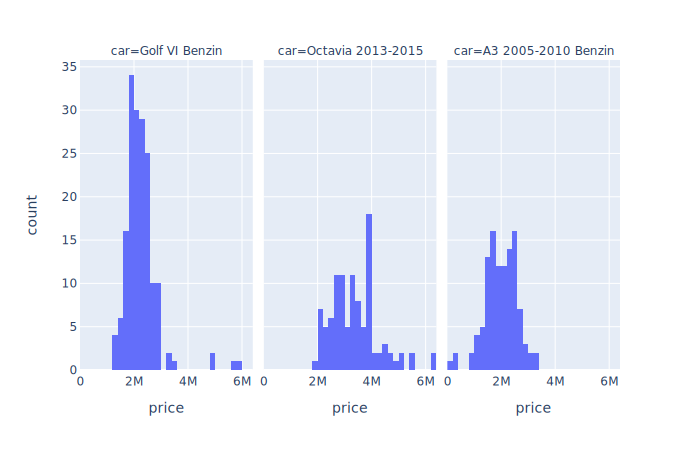

In [19]:
px.histogram(df, x='price', facet_col="car")


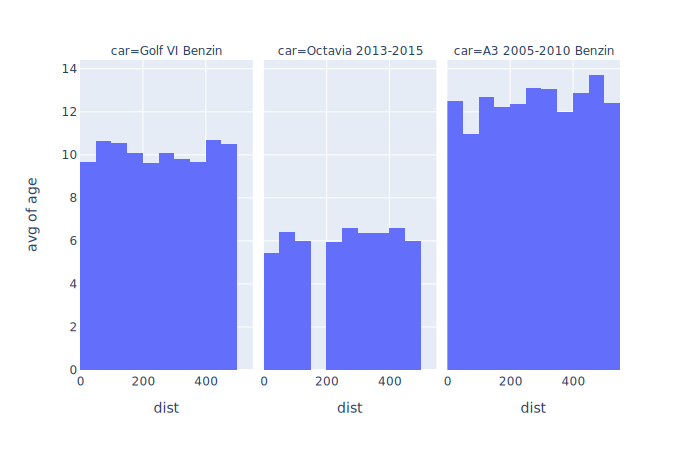

In [20]:
px.histogram(df, x='dist', y='age', histfunc='avg',facet_col="car")


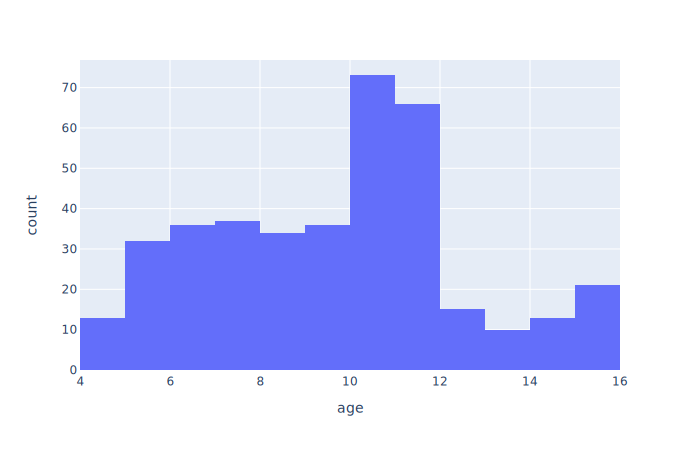

In [21]:
px.histogram(df, x='age')


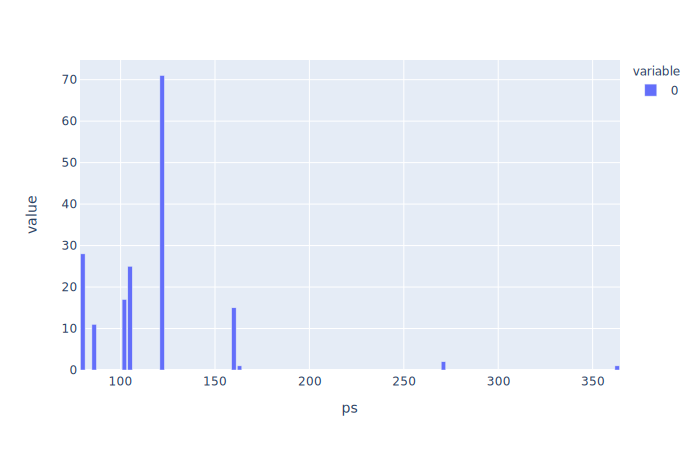

In [22]:
px.bar(df.query("car == 'Golf VI Benzin'").groupby('ps').size())
 

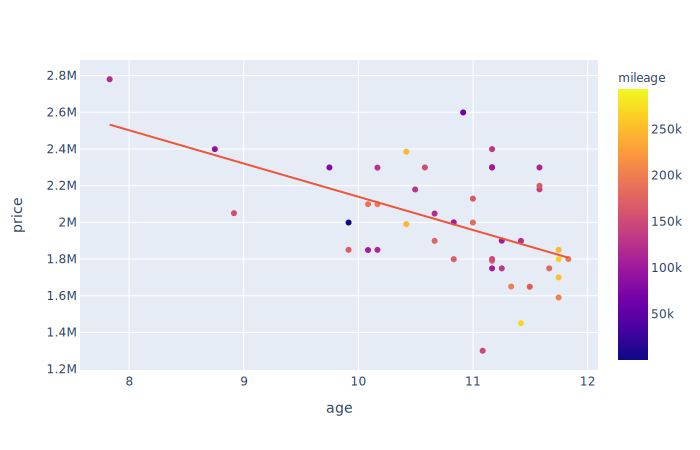

In [23]:
px.scatter(df.query("car == 'Golf VI Benzin' & (ps == 80 | ps == 102)"), x="age", y="price", trendline='ols',
           color='mileage')



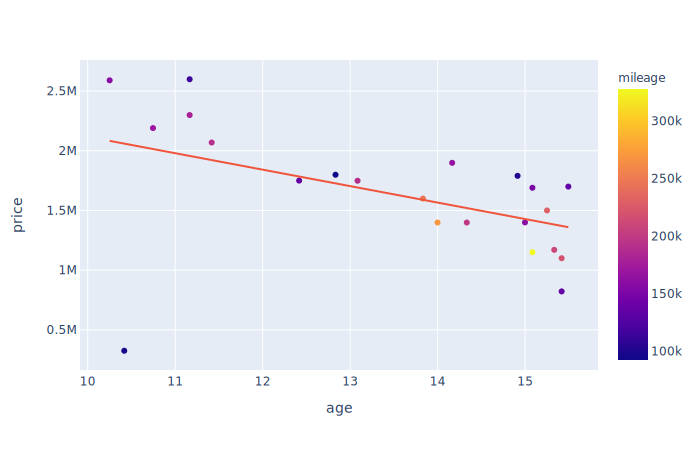

In [24]:
px.scatter(df.query("car == 'A3 2005-2010 Benzin' & (ps == 102)"), x="age", y="price", trendline='ols',
           color='mileage')
